Nadya Novalina - Submission Proyek Akhir : Image Classification Model Deployment

Dataset diambil dan dikumpulkan dari:
1. https://www.kaggle.com/khnhtrng/flowers
2. https://www.kaggle.com/joeylimzy/flowers
3. https://www.kaggle.com/sammymilitante/flowerclass
4. https://www.kaggle.com/bogdancretu/flower299
5. https://www.kaggle.com/ayaanmustafa/flower
6. https://www.kaggle.com/fasih1994/flowrs17-categorized
7. https://www.dreamstime.com/
8. https://www.kaggle.com/susamachokphoemphun/lotus-s

Detail Dataset (Total: 11200) :

1. Bellflower 1600
2. Daisy 1600
3. Dandelion 1600
4. Lotus 1600
5. Rose 1600
6. Sunflower 1600
7. Tulip 1600

Import Library

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Dropout , Flatten, Dense, BatchNormalization
from tensorflow.keras.applications import Xception
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

import matplotlib.pyplot as plt

import os
from PIL import Image 


Connect Google Drive / Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Detail Dataset

In [3]:
base_dir = '/content/drive/My Drive/flowers/'
flowers = os.listdir(base_dir)
flowers

['rose', 'bellflower', 'daisy', 'dandelion', 'lotus', 'sunflower', 'tulip']

In [4]:
total = 0

for i in flowers:
  dir = os.path.join(base_dir, i)
  num = len(os.listdir(dir))
  print(i+':', num, '\n')
  total = total + num
  
  img_name = os.listdir(dir)
  for k in range(7):
    img_path = os.path.join(dir, img_name[k])
    img = Image.open(img_path)
    print('Dimensi Gambar :',img.size, 'pixels')
    
  print('__________________________________\n')

print('\nTotal Dataset:', total)


rose: 1600 

Dimensi Gambar : (320, 250) pixels
Dimensi Gambar : (320, 240) pixels
Dimensi Gambar : (320, 240) pixels
Dimensi Gambar : (320, 240) pixels
Dimensi Gambar : (236, 313) pixels
Dimensi Gambar : (240, 159) pixels
Dimensi Gambar : (240, 159) pixels
__________________________________

bellflower: 1600 

Dimensi Gambar : (800, 533) pixels
Dimensi Gambar : (800, 533) pixels
Dimensi Gambar : (800, 533) pixels
Dimensi Gambar : (800, 730) pixels
Dimensi Gambar : (800, 600) pixels
Dimensi Gambar : (706, 900) pixels
Dimensi Gambar : (800, 533) pixels
__________________________________

daisy: 1600 

Dimensi Gambar : (500, 333) pixels
Dimensi Gambar : (240, 166) pixels
Dimensi Gambar : (320, 240) pixels
Dimensi Gambar : (500, 333) pixels
Dimensi Gambar : (500, 333) pixels
Dimensi Gambar : (320, 256) pixels
Dimensi Gambar : (180, 240) pixels
__________________________________

dandelion: 1600 

Dimensi Gambar : (240, 171) pixels
Dimensi Gambar : (320, 240) pixels
Dimensi Gambar : (180, 

Generate image data (augmentasi gambar, preprocessing data, pembagian data)

In [5]:
img_size   = (150, 150)
batch_size = 32  
num_epochs = 100
lr         = 0.0001

img_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=50,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip = True ,
                    vertical_flip = True ,
                    fill_mode='nearest',
                    validation_split=0.2)


train_generator = img_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=img_size,  
        batch_size=batch_size,
        shuffle=True,
        # karena merupakan masalah klasifikasi lebih 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical',
        subset='training')
 
validation_generator = img_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=img_size, 
        batch_size=batch_size,
        shuffle=True,
        # karena merupakan masalah klasifikasi lebih 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical',
        subset='validation')

Found 8960 images belonging to 7 classes.
Found 2240 images belonging to 7 classes.


Membangun arsitektur model dengan CNN

In [6]:
conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = True


model = models.Sequential()
model.add(conv_base)

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='softmax')) #softmax digunakan karena untuk multi-class klasifikasi


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          1179712   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1

Callback

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93 and logs.get('val_accuracy')>0.93):
      print("\nAkurasi telah mencapai >93%!")
      self.model.stop_training = True
callbacks = myCallback()

Compile model

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

Model training (pelatihan model)

In [9]:
#FIT MODEL
print(len(train_generator))
print(len(validation_generator))

step_size_train = train_generator.samples//batch_size
step_size_val = validation_generator.samples//batch_size

result = model.fit(
      train_generator,
      steps_per_epoch=step_size_train,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=num_epochs, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=step_size_val,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1, 
      callbacks=[callbacks]
      )

280
70
Epoch 1/100
280/280 [==============================] - 157s 530ms/step - loss: 0.8940 - accuracy: 0.6895 - val_loss: 0.4310 - val_accuracy: 0.8576
Epoch 2/100
280/280 [==============================] - 147s 524ms/step - loss: 0.3822 - accuracy: 0.8849 - val_loss: 0.3287 - val_accuracy: 0.8929
Epoch 3/100
280/280 [==============================] - 147s 525ms/step - loss: 0.2820 - accuracy: 0.9157 - val_loss: 0.2758 - val_accuracy: 0.9094
Epoch 4/100
280/280 [==============================] - 149s 530ms/step - loss: 0.2425 - accuracy: 0.9311 - val_loss: 0.2858 - val_accuracy: 0.9165
Epoch 5/100
280/280 [==============================] - 148s 529ms/step - loss: 0.2145 - accuracy: 0.9405 - val_loss: 0.2976 - val_accuracy: 0.9129
Epoch 6/100
280/280 [==============================] - 150s 533ms/step - loss: 0.1780 - accuracy: 0.9510 - val_loss: 0.2571 - val_accuracy: 0.9205
Epoch 7/100
280/280 [==============================] - 146s 521ms/step - loss: 0.1414 - accuracy: 0.9565 - val_

Visualisasi data

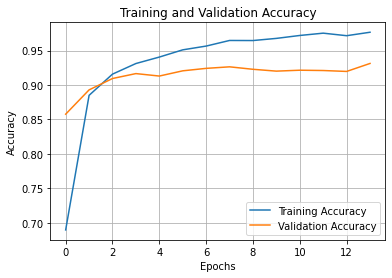

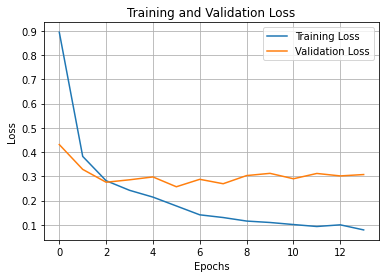

In [13]:


# Plot Model Accuracy
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
#jumlah epochs
epochs = range(len(acc))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Model Loss
loss_train = result.history['loss']
loss_val = result.history['val_loss']
plt.plot(epochs, loss_train,  label='Training Loss')
plt.plot(epochs, loss_val, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Export TFlite

In [14]:
# Konversi model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmp8e65zury/assets
